In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from tools import networkHelpers as nh
from umap import UMAP

In [2]:
hgnc_mapper = nh.fetch_hgnc_mapper()

In [4]:
duncan = pd.read_excel('../data/mib-ms/Duncan2012-Fig2D-data.xlsx', sheet_name='Sheet1')
duncan.head()

,Kinase ID,Gene Symbol,Name,4 hrs AZD6244/DMSO,12 hrs AZD6244/DMSO,24 hrs AZD6244/DMSO
0,EPHA2,EPHA2,Ephrin type-A receptor 2 OS=Homo sapiens GN=EP...,0.879022,0.591562,0.401791
1,KS6A1,RPS6KA1,Ribosomal protein S6 kinase alpha-1 OS=Homo sa...,1.116863,1.148154,1.541700
2,ERK2,MAPK1,Mitogen-activated protein kinase 1 OS=Homo sap...,1.037528,1.000000,1.056818
3,KCC2G,CAMK2G,Calcium/calmodulin-dependent protein kinase ty...,1.318257,1.047129,3.133286
4,GSK3B,GSK3B,Glycogen synthase kinase-3 beta OS=Homo sapien...,0.981748,0.772681,1.247383


In [15]:
all_mibrna = pd.read_excel('../data/mib-ms/All_mibplusrnadata_autoscaled.xlsx', sheet_name='Sheet1', header=0, skiprows=0, index_col=0)
subtypes_all_mibrna = all_mibrna.iloc[0, :]
which_omic = all_mibrna.iloc[1, :]

all_mibrna = all_mibrna.loc[all_mibrna.index.tolist()[2:]]
rna_mibrna = all_mibrna[all_mibrna.columns[which_omic == 'rna']]
mib_mibrna = all_mibrna[all_mibrna.columns[which_omic != 'rna']]

mib_mibrna.head()

,SUM159.1,SUM159.2,MDA231.1,MDA231.2,SUM229neg.1,SUM229neg.2,HCC1806.1,HCC1806.2,MDA468.1,MDA468.2,...,HCC1954.1,HCC1954.2,MCF7.1,MCF7.2,T47D.1,T47D.2,HCC1428.1,HCC1428.2,ZR751.1,ZR751.2
AAK1,0.563173,0.620986,0.562031,0.426585,0.84158,0.602266,0.624378,0.633291,0.526394,0.469651,...,0.589088,0.559325,0.577343,0.650038,0.609829,0.610864,0.616032,0.384855,0.374681,0.751435
AAPK1,0.507465,0.577258,0.617139,0.583473,0.786363,0.550779,0.593335,0.688663,0.561773,0.574942,...,0.642642,0.633054,0.659526,0.724569,0.674675,0.689711,0.759279,0.564204,0.548872,0.799326
AAPK2,0.251648,0.477315,0.493465,0.418181,0.653195,0.422767,0.443998,0.656483,0.307084,0.317665,...,0.553135,0.567906,0.518407,0.660683,0.58118,0.596361,0.67794,0.4956,0.307634,0.697692
ABL1,0.109939,0.263185,0.436958,0.368187,0.500801,0.166916,0.179506,0.192641,-0.175774,0.272601,...,0.229982,0.226838,0.333653,0.453882,0.377198,0.286458,0.619932,0.241495,0.104607,0.492236
ABL2,0.123534,0.292926,0.460951,0.381616,0.516715,0.178025,0.216407,0.210545,-0.141703,0.277062,...,0.273476,0.27511,0.28847,0.425466,0.355888,0.28181,0.53327,0.303736,0.147329,0.541386


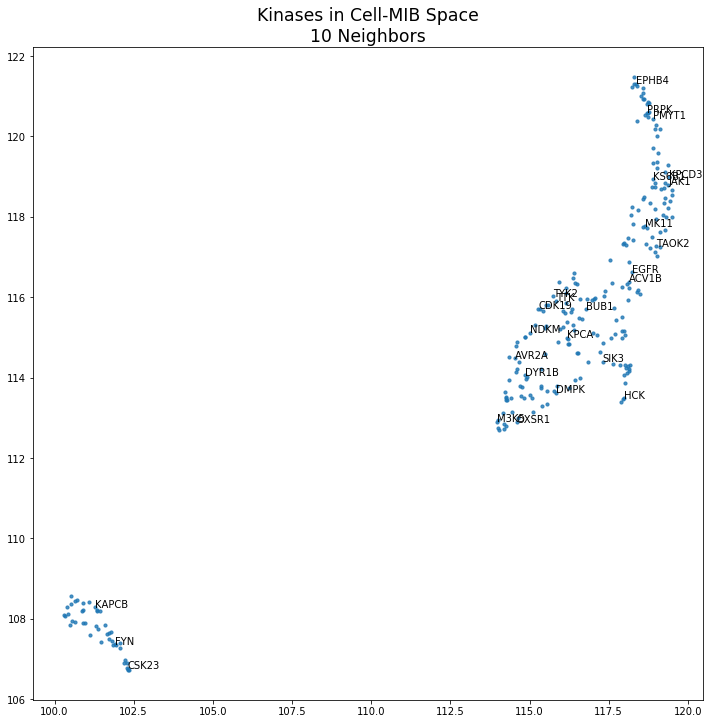

In [69]:
u = UMAP(n_neighbors=10)
coords = u.fit_transform(mib_mibrna)

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x=coords[:, 0], y=coords[:, 1], s=10, alpha = .8)
ax.set_title('Kinases in Cell-MIB Space\n10 Neighbors', size='xx-large')

# randomly annotate ~ 25% of points
for i, kinase_name in enumerate(mib_mibrna.index):
    if np.random.randn()>1.2:
        ax.annotate(kinase_name, (coords[i, 0], coords[i, 1]))

plt.show()

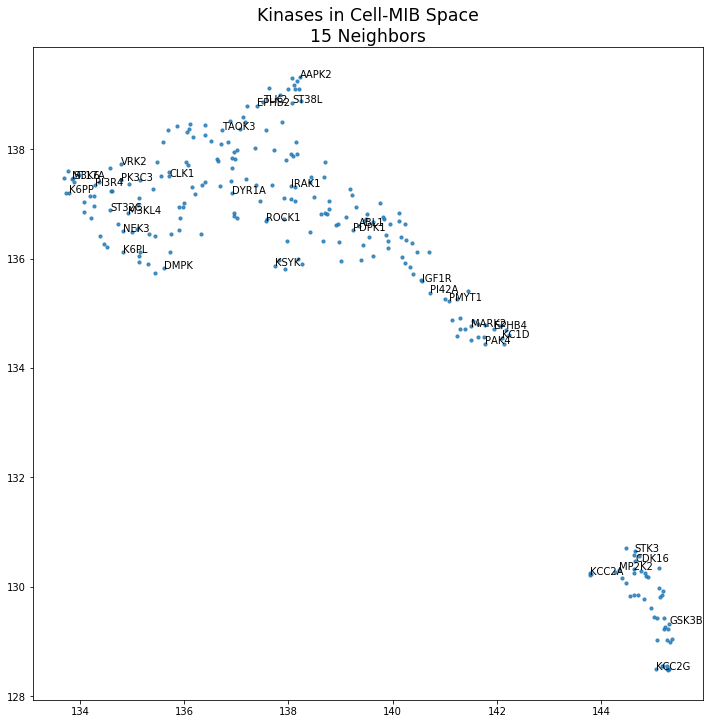

In [73]:
u = UMAP(n_neighbors=15)
coords = u.fit_transform(mib_mibrna)

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x=coords[:, 0], y=coords[:, 1], s=10, alpha = .8)
ax.set_title('Kinases in Cell-MIB Space\n15 Neighbors', size='xx-large')

# randomly annotate ~ 25% of points
for i, kinase_name in enumerate(mib_mibrna.index):
    if np.random.randn()>1.2:
        ax.annotate(kinase_name, (coords[i, 0], coords[i, 1]))

plt.show()

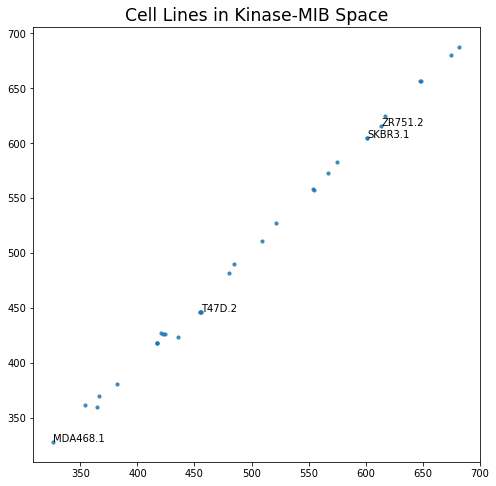

In [77]:
u_cell = UMAP(n_neighbors=5)
cell_coords = u_cell.fit_transform(mib_mibrna.T)

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=cell_coords[:, 0], y=cell_coords[:, 1], s=10, alpha = .8)
ax.set_title('Cell Lines in Kinase-MIB Space', size='xx-large')

# randomly annotate ~ 30% of cell lines
for i, cell_name in enumerate(mib_mibrna.columns):
    if np.random.randn()>1:
        ax.annotate(cell_name, (cell_coords[i, 0], cell_coords[i, 1]))

plt.show()

In [ ]:
'''bt474_lapatinib = pd.read_excel('../data/mib-ms/BT474-300nM Lapatinib Pooled stats.xlsx', sheet_name='Sheet1')
duncan.head()'''